In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
l1 = ['avg_returns.csv', 'fees.csv', 'cumulative_returns.csv']
l2 = ['convert_'+x for x in l1]

for infile, outfile in zip(l1, l2):
    search_text = 'N/A'
    replace_text = '0.0%'

    original_df = pd.read_csv(infile)
    percent_text = '%'
    blank= ''
    asterisk_text ='*'

    with open(infile, 'r') as file:
    
        # Reading the content of the file
        # using the read() function and storing
        # them in a new variable
        data = file.read()
    
        # Searching and replacing the text
        # using the replace() function
        data = data.replace(search_text, replace_text)
        data = data.replace(percent_text, blank)
        data = data.replace(asterisk_text, blank)

    # Opening our text file in write only
    # mode to write the replaced content
    with open(outfile, 'w') as file:
    
        # Writing the replaced data in our
        # text file
        file.write(data)

    # Printing Text replaced
    print("Text replaced, wrote: " +  outfile)

Text replaced, wrote: convert_avg_returns.csv
Text replaced, wrote: convert_fees.csv
Text replaced, wrote: convert_cumulative_returns.csv


In [3]:
for new_csv in l2:
    my401k_df = pd.read_csv(new_csv)
    l = (my401k_df['Category'] == '0.0')
    my401k_df.loc[l, 'Category'] = 'Target Fund'
    my401k_df['ticker'] = ''
    #print (my401k_df.head())
    print (new_csv, my401k_df.columns)

convert_avg_returns.csv Index(['Name/Inception Date', 'Asset Class', 'Category',
       'Plan-specific option', '1 Year', '3 Year', '5 Year', '10 Year/LOF',
       'Returns As Of', 'Bench- mark', 'ticker'],
      dtype='object')
convert_fees.csv Index(['Name/Inception Date', 'Asset Class', 'Category',
       'Plan-specific option', 'Gross Expense Ratio', 'Shareholder Fees',
       'ticker'],
      dtype='object')
convert_cumulative_returns.csv Index(['Name/Inception Date', 'Asset Class', 'Category',
       'Plan-specific option', 'Daily', 'MTD', 'YTD', 'Returns As Of',
       '1 Month', '3 Months', 'Returns As Of.1', 'Bench- mark', 'ticker'],
      dtype='object')


In [4]:
fields = ['Name/Inception Date', 'Gross Expense Ratio']
fees_df = pd.read_csv('convert_fees.csv', usecols=fields)
fees_df.head()

,Name/Inception Date,Gross Expense Ratio
0,DODGE & COX STOCK X (DOXGX)01/04/1965,0.46
1,FID 500 INDEX (FXAIX)02/17/1988,0.02
2,FID CONTRAFUND K6 (FLCNX)05/25/2017,0.45
3,JPM LG CAP GROWTH R6 (JLGMX)02/28/1992,0.52
4,VAN FTSE SOC IDX ADM (VFTAX)01/14/2003,0.14


In [5]:
#fields = ['Name/Inception Date', 'Gross Expense Ratio']
avg_returns_df = pd.read_csv('convert_avg_returns.csv')
del avg_returns_df['Bench- mark']
renameCols = ['1 Year', '3 Year'	, '5 Year'	, 'Returns As Of'	,'10 Year/LOF']
doRename = False
if (doRename):
    for d in renameCols:
        if d in avg_returns_df:
            avg_returns_df.rename(columns = {d: "avg_"+d}, inplace=True)

avg_returns_df.head()

,Name/Inception Date,Asset Class,Category,Plan-specific option,1 Year,3 Year,5 Year,10 Year/LOF,Returns As Of
0,DODGE & COX STOCK X (DOXGX)01/04/1965,Stock Investments,Large Cap,Yes,27.83,10.38,14.57,11.29,09/30/2024
1,FID 500 INDEX (FXAIX)02/17/1988,Stock Investments,Large Cap,No,36.33,11.90,15.96,13.37,09/30/2024
2,FID CONTRAFUND K6 (FLCNX)05/25/2017,Stock Investments,Large Cap,Yes,45.99,12.54,18.77,16.71,09/30/2024
3,JPM LG CAP GROWTH R6 (JLGMX)02/28/1992,Stock Investments,Large Cap,Yes,44.56,11.64,21.25,17.81,09/30/2024
4,VAN FTSE SOC IDX ADM (VFTAX)01/14/2003,Stock Investments,Large Cap,Yes,37.64,10.41,16.03,13.82,09/30/2024


In [6]:
cumulative_returns_df = pd.read_csv('convert_cumulative_returns.csv' )
delCols = ['Bench- mark', 'Returns As Of.1', 'Plan-specific option', 'Category','Asset Class']
for d in delCols:
    if d in cumulative_returns_df:
        del cumulative_returns_df[d]
renameCols = ['Daily', 'MTD'	, 'YTD'	, 'Returns As Of'	,'1 Month'	, '3 Months']
doRename = False
if (doRename):
    for d in renameCols:
        if d in cumulative_returns_df:
            cumulative_returns_df.rename(columns = {d: "cumlative_"+d}, inplace=True)
        
cumulative_returns_df.head()

,Name/Inception Date,Daily,MTD,YTD,Returns As Of,1 Month,3 Months
0,DODGE & COX STOCK X (DOXGX)01/04/1965,0.93,1.01,17.55,10/11/2024,0.65,7.19
1,FID 500 INDEX (FXAIX)02/17/1988,0.61,0.97,23.24,10/11/2024,2.13,5.88
2,FID CONTRAFUND K6 (FLCNX)05/25/2017,0.88,2.05,33.80,10/11/2024,2.06,4.39
3,JPM LG CAP GROWTH R6 (JLGMX)02/28/1992,0.60,2.00,29.94,10/11/2024,2.22,2.43
4,VAN FTSE SOC IDX ADM (VFTAX)01/14/2003,0.57,0.95,22.75,10/11/2024,2.22,5.24


In [18]:
merged_df = pd.merge(cumulative_returns_df, avg_returns_df, on='Name/Inception Date')
fid401k_df = pd.merge(merged_df, fees_df, on='Name/Inception Date')
fid401k_df['DateString'] = fid401k_df['Name/Inception Date'].str[-10:]
fid401k_df['Name'] = fid401k_df['Name/Inception Date'].str[:-10]
fid401k_df['Inception Date'] = pd.to_datetime(fid401k_df['DateString'], format="%m/%d/%Y")
fid401k_df['ticker'] = fid401k_df['Name/Inception Date'].apply(lambda st: st[st.find("(")+1:st.find(")")])
del fid401k_df['DateString'] 
fid401k_df.head()


,Name/Inception Date,Daily,MTD,YTD,Returns As Of_x,1 Month,3 Months,Asset Class,Category,Plan-specific option,1 Year,3 Year,5 Year,10 Year/LOF,Returns As Of_y,Gross Expense Ratio,Name,Inception Date,ticker
0,DODGE & COX STOCK X (DOXGX)01/04/1965,0.93,1.01,17.55,10/11/2024,0.65,7.19,Stock Investments,Large Cap,Yes,27.83,10.38,14.57,11.29,09/30/2024,0.46,DODGE & COX STOCK X (DOXGX),1965-01-04,DOXGX
1,FID 500 INDEX (FXAIX)02/17/1988,0.61,0.97,23.24,10/11/2024,2.13,5.88,Stock Investments,Large Cap,No,36.33,11.90,15.96,13.37,09/30/2024,0.02,FID 500 INDEX (FXAIX),1988-02-17,FXAIX
2,FID CONTRAFUND K6 (FLCNX)05/25/2017,0.88,2.05,33.80,10/11/2024,2.06,4.39,Stock Investments,Large Cap,Yes,45.99,12.54,18.77,16.71,09/30/2024,0.45,FID CONTRAFUND K6 (FLCNX),2017-05-25,FLCNX
3,JPM LG CAP GROWTH R6 (JLGMX)02/28/1992,0.60,2.00,29.94,10/11/2024,2.22,2.43,Stock Investments,Large Cap,Yes,44.56,11.64,21.25,17.81,09/30/2024,0.52,JPM LG CAP GROWTH R6 (JLGMX),1992-02-28,JLGMX
4,VAN FTSE SOC IDX ADM (VFTAX)01/14/2003,0.57,0.95,22.75,10/11/2024,2.22,5.24,Stock Investments,Large Cap,Yes,37.64,10.41,16.03,13.82,09/30/2024,0.14,VAN FTSE SOC IDX ADM (VFTAX),2003-01-14,VFTAX


<Figure size 1000x1600 with 0 Axes>

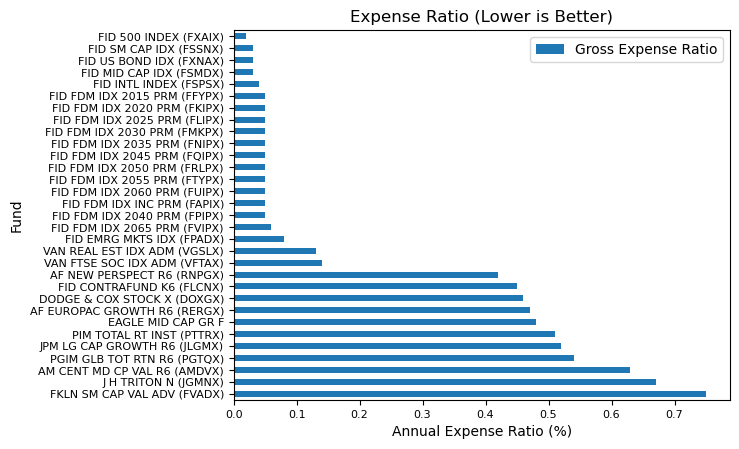

In [8]:
# Get the Horizontal bar
cols = ['Name', 'Gross Expense Ratio', ]
#my401k_df[cols].head()
chart_df = fid401k_df[cols].copy()
#chart_df = chart_df.sort_values('Gross Expense Ratio', ascending=True)
chart_df = chart_df.sort_values('Gross Expense Ratio', ascending=False)

chart_df = chart_df.set_index('Name')
#chart_df.head()

plt.figure(figsize=(10, 16))
ax = chart_df.plot.barh(fontsize=8)
ax.set_facecolor('xkcd:white')
ax.set_xlabel('Annual Expense Ratio (%)')
ax.set_ylabel('Fund')
plt.title('Expense Ratio (Lower is Better)')
#plt.savefig('Exp_v_10yr_perf.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
fid401k_df.columns

Index(['Name/Inception Date', 'Daily', 'MTD', 'YTD', 'Returns As Of_x',
       '1 Month', '3 Months', 'Asset Class', 'Category',
       'Plan-specific option', '1 Year', '3 Year', '5 Year', '10 Year/LOF',
       'Returns As Of_y', 'Gross Expense Ratio', 'Name', 'Inception Date',
       'ticker'],
      dtype='object')

In [10]:
fig = px.scatter(fid401k_df, x="Inception Date", y="10 Year/LOF", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name'],
                    labels={
                     "Inception Date": "Fund Inception",
                     "10 Year/LOF": "Return 10 Year/LOF (%)",
                 },
                title="Performance v. Age of Fund (Expense Ratio=Size)")
fig.show()

In [11]:
fig = px.scatter(fid401k_df, x="YTD", y="5 Year", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name'],
                         labels={
                     "YTD": "Return YTD (%)",
                     "5 Year": "Return 5 Year(%)",
                 },
                title="5 Yr Performance v. YTD Performance (Expense Ratio=Size)")
            
fig.show()
fig.write_html("expense_perf_5yr.html")

In [12]:
fig = px.scatter(fid401k_df, x="YTD", y="10 Year/LOF", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name/Inception Date'],
                title="10 Yr Performance v. YTD Performance (Expense Ratio=Size)")
fig.show()
fig.write_html("expense_perf_10yr.html")

In [13]:
fig = px.scatter(fid401k_df, x="1 Year", y="10 Year/LOF", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name/Inception Date'],
                title="10 Yr Performance v. YTD Performance (Expense Ratio=Size)")
fig.show()
fig.write_html("expense_perf_10_v_1yr.html")

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = fid401k_df.select_dtypes(include=numerics)
num_df['name'] =  fid401k_df['Name/Inception Date']
num_df['category'] =  fid401k_df['Category']
#num_df.head()
fig = px.scatter(num_df, x="YTD", y="10 Year/LOF",size="Gross Expense Ratio", color="category",
                 hover_name="name", size_max=60, title="10 Yr Performance v. YTD Performance (Expense Ratio=Size)")
fig.show()

In [15]:
fig = px.scatter(num_df, x="YTD", y="1 Year",size="Gross Expense Ratio", color="category",
                 hover_name="name", size_max=60, title="1 Yr Performance v. YTD Performance (Expense Ratio=Size)")
fig.show()

In [16]:
fig = px.scatter(fid401k_df, x="1 Year", y="10 Year/LOF", color="Category",
                 size='Gross Expense Ratio', hover_data=['Name/Inception Date'], title="1 Yr Performance v. 10Yr LoF Performance (Expense Ratio=Size)")
fig.show()
fig.write_html("expense_perf_10_v_1yr.html")